This notebook looks at the behavioral data collected as part of the LEMON Project. We'd like to know which of these questionaaire might be a better choice for a classification task. So our first question would be what can resting state EEG data reveal about which people's current mental state, and their emotional and cognitive abilities. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_dir = 'data/LEMON_data/behavioral/Behavioural_Data_MPILMBB_LEMON/'

/var/folders/pn/qy0qc5tx7t7_97xjmy6pvksc0000gn/T/ipykernel_98576/414264076.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Personality and Emotions

### MDBF

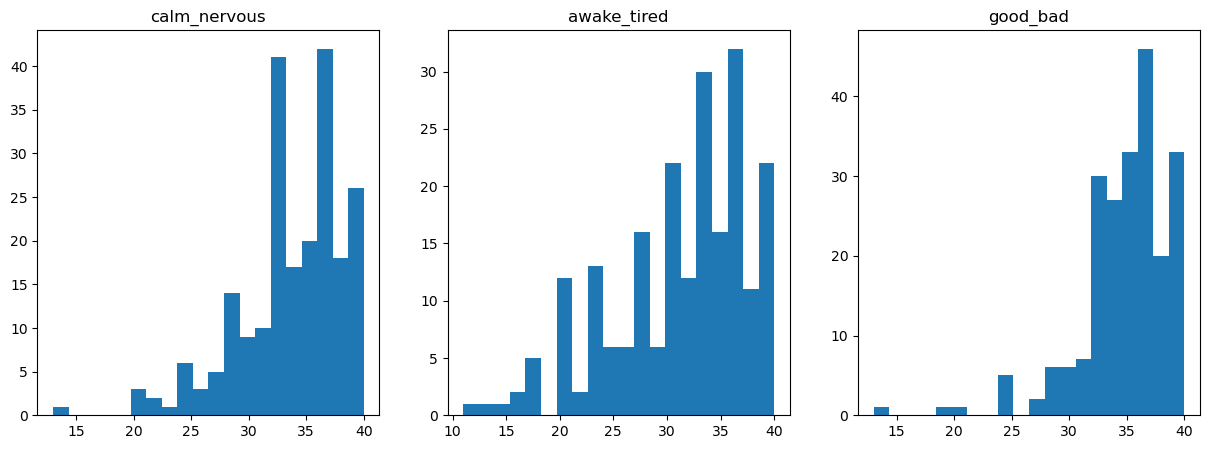

In [7]:
data_dir = data_dir + 'Emotion_and_Personality_Test_Battery_LEMON/'
data = pd.read_csv(data_dir+'MDBF_Day2.csv',
                   index_col=0)
data.rename(columns={'MDBF_Day2_RU_Scale': 'calm_nervous',
                     'MDBF_Day2_WM_Scale': 'awake_tired',
                     'MDBF_Day2_GS_Scale': 'good_bad'}, inplace=True)
data.describe()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(data['calm_nervous'], bins=20)
ax[0].set_title('calm_nervous')
ax[1].hist(data['awake_tired'], bins=20)
ax[1].set_title('awake_tired')
ax[2].hist(data['good_bad'], bins=20)
ax[2].set_title('good_bad')
plt.show()

### Emotional Regulation 

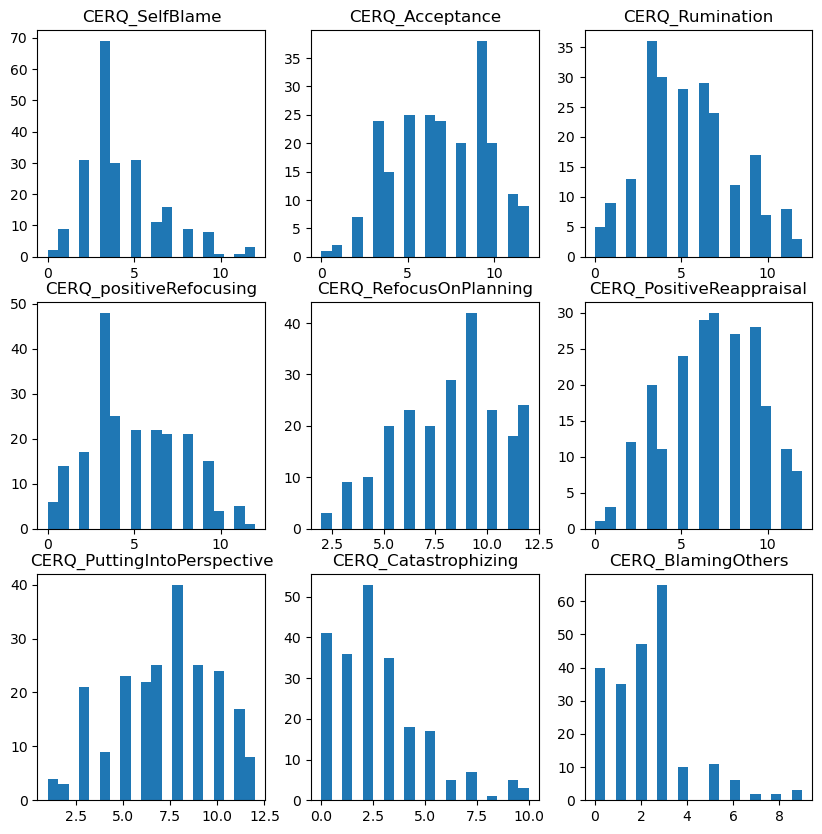

In [6]:
data = pd.read_csv(data_dir+'CERQ.csv',
                   index_col=0)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i, col in enumerate(data.columns):
    ax[i//3, i%3].hist(data[col], bins=20)
    ax[i//3, i%3].set_title(col)


### Other Questionaires

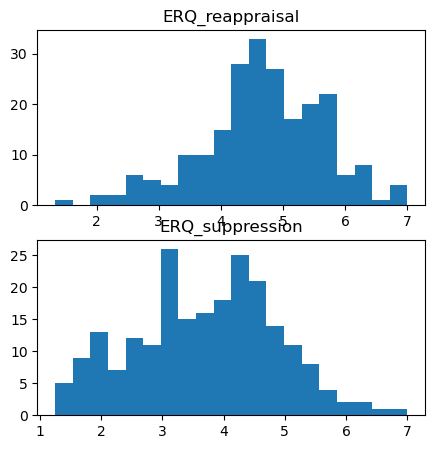

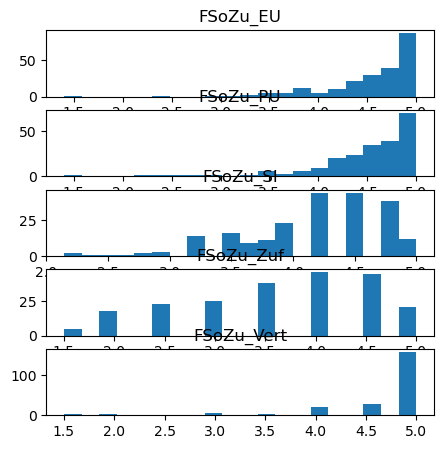

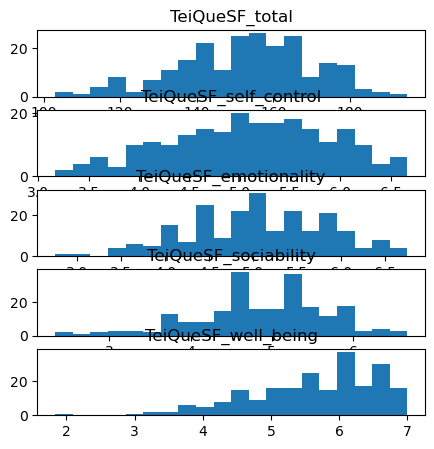

In [37]:
from pathlib import Path

for i, path in enumerate(list(Path(data_dir).rglob('*.csv'))[:3]):
    if path.stem.__contains__('MDBF'):
        continue
    # print(i+1, '\033[1m' + path.stem + '\033[0m')
    data = pd.read_csv(path, index_col=0)
    columns = data.columns
    fig, ax = plt.subplots(len(columns), figsize=(5, 5))
    for i, col in enumerate(columns):
        ax[i].hist(data[col], bins=20)
        ax[i].set_title(col)